In [28]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys

In [29]:
tf.__version__

'2.8.0'

In [48]:
training_data=np.array([[0,0],[0,1],[1,0],[1,1]],"float32")
target_data=np.array([[0],[1],[1],[0]],"float32")

In [31]:
model=tf.keras.models.Sequential()
#Add the layers
model.add(tf.keras.layers.Dense(4,input_dim=2,activation='relu')) #each input sample is on array of length '2' (0,1) , 4= number of outout layers
#it means 2 neurons are spreading to 4 neurons (which are in hidden layer) which is connected to output neuron. For the hidden layer there is no
#constraint, so we use 'Relu' function. Relu = 0 for all (-ve) values, Relu=1 (for all positive values)

model.add(tf.keras.layers.Dense(1,activation='sigmoid')) #Output dimension, here the input dimension is not mentioned since for this layer the 
# input dimension=4 . Since at the ouput we need only '0' or '1' ouput, so we use the sigmoid functuion.

In [50]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics='binary_accuracy') #Here we are configuring the learning process. so that neural
#networks are able to make right adjustments to the weights. Using the weights we need to calculate a number showing how good is our model performing
#or how bad is it performing and then try to get that number lower, that number = 'loss'. Here loss function= Mean Squared Error function. 
#The optimizer rightly optimizes the weights

In [33]:
model.summary() #dense_7=output layer which gives probability score  dense_6 = hidden layer

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 12        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [51]:
history=model.fit(training_data,target_data,epochs=500, verbose=2)  #1-> training_data, 2-> target_data, 3-> number of epochs of learning iterations 
#4-> This one tells Tensorflow how much info to print out during the training

Epoch 1/500
1/1 - 0s - loss: 0.2583 - binary_accuracy: 0.7500 - 486ms/epoch - 486ms/step
Epoch 2/500
1/1 - 0s - loss: 0.2580 - binary_accuracy: 0.7500 - 6ms/epoch - 6ms/step
Epoch 3/500
1/1 - 0s - loss: 0.2578 - binary_accuracy: 0.7500 - 6ms/epoch - 6ms/step
Epoch 4/500
1/1 - 0s - loss: 0.2575 - binary_accuracy: 0.7500 - 4ms/epoch - 4ms/step
Epoch 5/500
1/1 - 0s - loss: 0.2572 - binary_accuracy: 0.7500 - 5ms/epoch - 5ms/step
Epoch 6/500
1/1 - 0s - loss: 0.2570 - binary_accuracy: 0.7500 - 5ms/epoch - 5ms/step
Epoch 7/500
1/1 - 0s - loss: 0.2567 - binary_accuracy: 0.7500 - 4ms/epoch - 4ms/step
Epoch 8/500
1/1 - 0s - loss: 0.2564 - binary_accuracy: 0.7500 - 5ms/epoch - 5ms/step
Epoch 9/500
1/1 - 0s - loss: 0.2562 - binary_accuracy: 0.7500 - 8ms/epoch - 8ms/step
Epoch 10/500
1/1 - 0s - loss: 0.2559 - binary_accuracy: 0.7500 - 6ms/epoch - 6ms/step
Epoch 11/500
1/1 - 0s - loss: 0.2556 - binary_accuracy: 0.7500 - 7ms/epoch - 7ms/step
Epoch 12/500
1/1 - 0s - loss: 0.2554 - binary_accuracy: 0.7

In [53]:
print(model.predict(training_data).round()) #-> here we are making predictions
#The predictions are showing -> input (0,0)  output (0)
#                               input (0,1)  output (1)
#                               input (1,0)  output (1)
#                               input (1,1)  output (0)
#You are seeing only the outputs below

[[0.]
 [1.]
 [1.]
 [0.]]


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Loss')

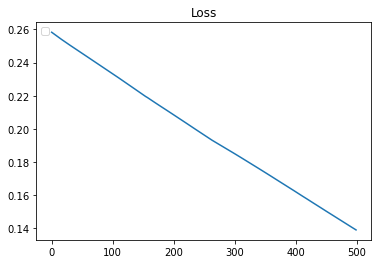

In [56]:
loss_curve= history.history["loss"]
acc_curve= history.history["binary_accuracy"]
plt.legend(loc='upper left')
plt.plot(loss_curve,label="Train")
plt.title("Loss")

No handles with labels found to put in legend.


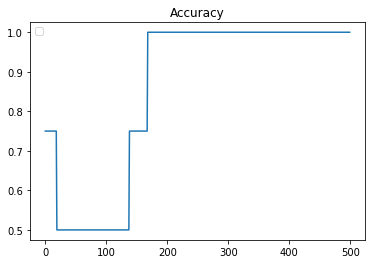

In [57]:
plt.legend(loc='upper left')
plt.plot(acc_curve,label="Train")
plt.title("Accuracy")
plt.show()